# **Decision Tree**
Decision tree merupakan algoritma supervised learning yang sering digunakan karena dapat digunakan untuk classification and regression. Decision tree berfungsi membuat block untuk beberapa algoritma pembelajaran ensemble terkemuka seperti random forests, GBDT, and XGBOOST.

# Decision Tree Working Methodology
***

## Load Dataset

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df = pd.read_csv(url,header=None,names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection

In [ ]:
# Split dataset menjadi Feature dan Target/label
feature_cols = ['pregnant','glucose','bp','insulin','bmi','pedigree','age']
X = df[feature_cols]
y = df.label

# Split dataset menjadi train dataset dan test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(f'Data Train Feature : {X_train.shape}')
print(f'Data Test Feature : {X_test.shape}')
print(f'Data Train Label : {y_train.shape}')
print(f'Data Test Label : {y_test.shape}')

Data Train Feature : (614, 7)
Data Test Feature : (154, 7)
Data Train Label : (614,)
Data Test Label : (154,)


## Create Decision Tree Classifier

In [ ]:
# Buat Decision Tree Classifier 
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier ke data train
clf.fit(X_train,y_train)

# Buat prediksi respon pada data test
y_pred = clf.predict(X_test)

In [ ]:
# Tampilkan akurasi model
print('Accuracy :', round(metrics.accuracy_score(y_test,y_pred),2))
print('Precision :', metrics.precision_score(y_test,y_pred))
print('Recall :', round(metrics.recall_score(y_test,y_pred),2))
print('F-1 Score :', round(metrics.f1_score(y_test,y_pred),2))

Accuracy : 0.75
Precision : 0.56
Recall : 0.62
F-1 Score : 0.59


## Tuning Parameter

In [ ]:
# Buat Decision Tree Classifier dengan Entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Tampilkan akurasi model
print('Accuracy :', round(metrics.accuracy_score(y_test,y_pred),2))
print('Precision :', round(metrics.precision_score(y_test,y_pred),2))
print('Recall :', round(metrics.recall_score(y_test,y_pred),2))
print('F-1 Score :', round(metrics.f1_score(y_test,y_pred),2))

Accuracy : 0.71
Precision : 0.5
Recall : 0.56
F-1 Score : 0.53


# **Decision Tree Classification**
***

## Process Dataset

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Loading IRIS data from sklearn
iris = load_iris()
features = pd.DataFrame(iris.data)
labels = pd.DataFrame(iris.target)

In [ ]:
#Train Test split using sklearn
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2)

print(features.shape)
print(labels.shape)

(150, 4)
(150, 1)


## Train Decision Tree Model

In [ ]:
# Training the Decision Tree model with criterion entropy
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(pred)

[0 0 2 0 0 1 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0]


## Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(round(accuracy,2))

0.96


## Model Visualization

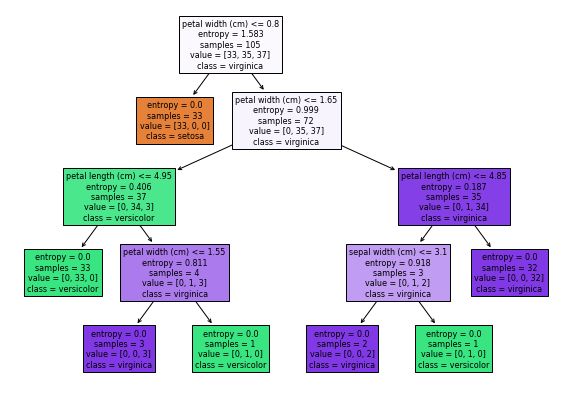

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,7))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# **Decision Tree Regression**
***

## Process Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = np.array([['Asset Flip', 100, 1000],['Text Based', 500, 3000],
                    ['Visual Novel', 1500, 5000],['2D Pixel Art', 3500, 8000],
                    ['2D Vector Art', 5000, 6500],['Strategy', 6000, 7000],
                    ['First Person Shooter', 8000, 15000],['Simulator', 9500, 20000],
                    ['Racing', 12000, 21000],['RPG', 14000, 25000],
                    ['Sandbox', 15500, 27000],['Open-World', 16500, 30000],
                    ['MMOFPS', 25000, 52000],['MMORPG', 30000, 80000]])

# Split dataset menjadi Feature dan Target/label
X = dataset[:, 1:2].astype(int) 
y = dataset[:, 2].astype(int)

## Train Decision Tree Model

In [ ]:
# Training a decision tree regression model
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state = 2) 
regressor.fit(X, y)

DecisionTreeRegressor(random_state=2)

## Analisis Prediksi

In [ ]:
# Buat data untuk analisis
X_grid = np.arange(min(X), max(X), 0.01)    # buat matriks 1xn dari nilai min X hingga max X dengan step 0.01
X_grid = X_grid.reshape((len(X_grid), 1))            # reshape menjadi matriks nx1

# Buat prediction analysis dari data x grid
y_pred = regressor.predict(X_grid)

### Predicted Data Visualization

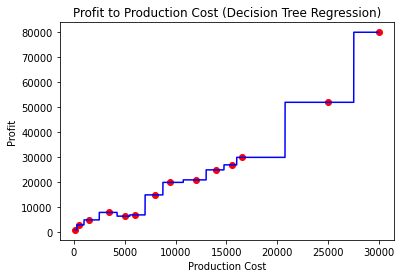

In [ ]:
# scatter plot for original data
plt.scatter(X, y, color = 'red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('Profit to Production Cost (Decision Tree Regression)')
plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.show()

## Model Visualization

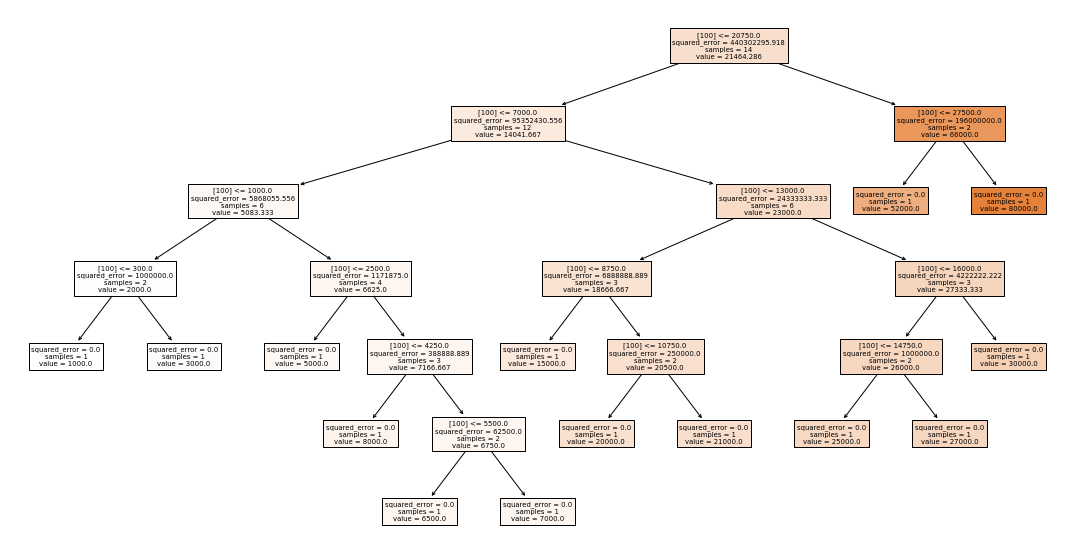

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19,10))
tree.plot_tree(regressor, feature_names=X, class_names=y, 
filled=True)
plt.show()

# **Tuning Hyperparameter**
***
Sisi negatif dari Decision Tree adalah dia rentan terhadap overfitting. Decision Tree dapat dengan mudah menjadi overcomplex yang mana mencegah mereka dari generalisasi terhadap struktur pada dataset. Oleh karena itu, model kemungkinan akan berakhir overfitting yang mana merupakan permasalahan serious pada machine learning. Untuk mencegah permasalahan ini, kita perlu untuk dengan hati-hati mengatur hyperparameter dari decision trees.


## Load Dataset

In [29]:
# Loading libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

#Convert to pandas dataframe
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
selection = 
df[].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [30]:
df['target'].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [34]:
# Loading wine dataset
X, y = load_wine(return_X_y=True)

## Train Decision Tree Model

In [33]:
# Train a decision tree classifier on wine dataset
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

## Model Visualization

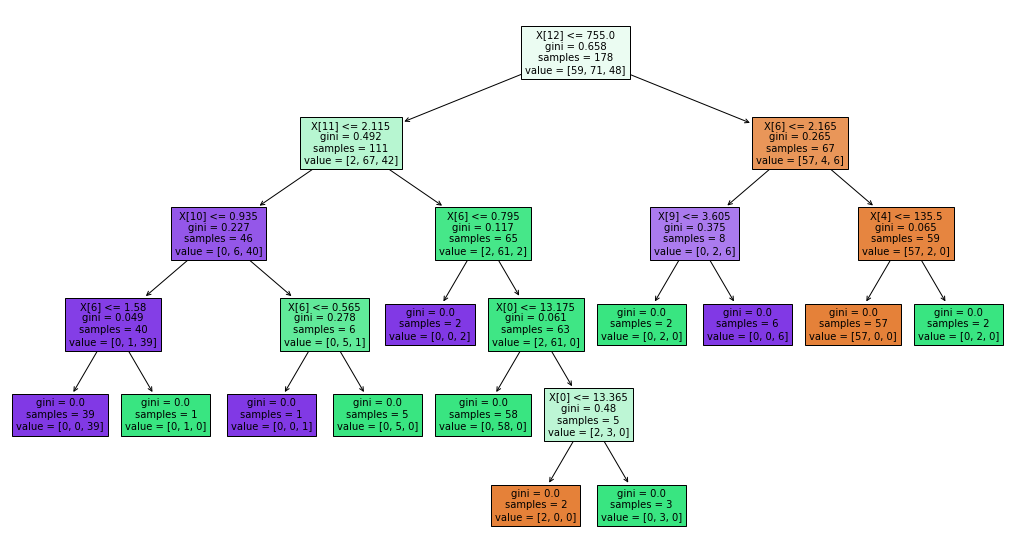

In [35]:
# Visualizing decision tree classifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

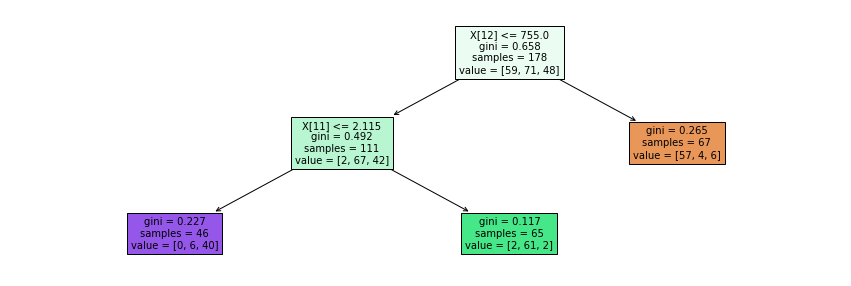

In [41]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)
plt.figure(figsize=(15,5))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

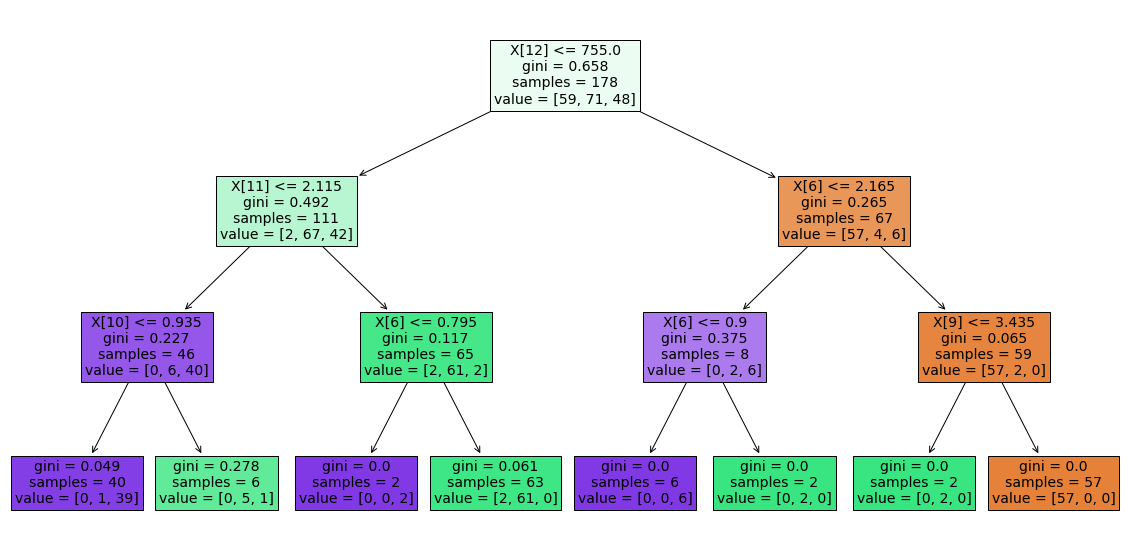

In [43]:
# Tuning max_depth
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

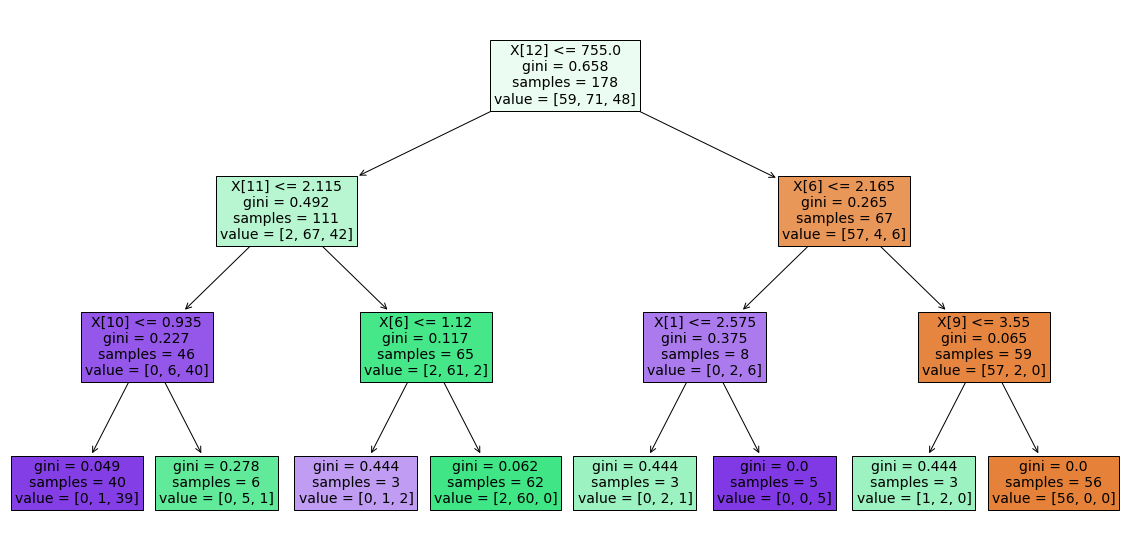

In [45]:
# Tuning max_depth and min_samples_leaf
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

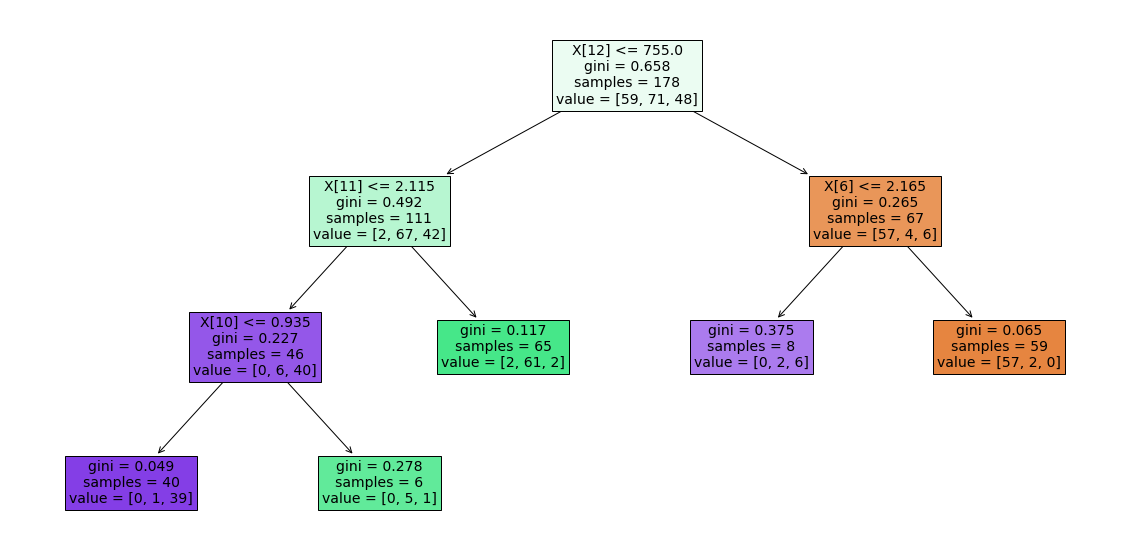

In [47]:
# Tuning max_leaf_nodes
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()